In [33]:
#creating confusion matrix for model 
import sklearn
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

import numpy as np 
import pandas as pd
import json
import datasets

/opt/miniconda3/envs/nlp_final/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [43]:
#read result json and extract confusion matrix 
with open('results/full_model_hans_metrics.json', 'r') as f:
    results = json.load(f)
    
confusion_matrix = results['confusion_matrix']

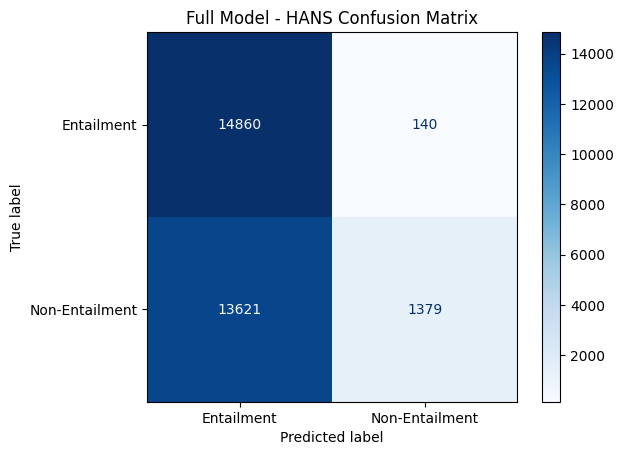

In [44]:
#Creating confusion matrix plot for FULL MODEL on HANS dataset
# Collapse 3x3 to 2x2 by removing neutral class (row 1, column 1)
cm_array = np.array(confusion_matrix)
cm_2x2 = np.delete(np.delete(cm_array, 1, axis=0), 1, axis=1)
# Plot 2x2 confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2x2,
                              display_labels=['Entailment', 'Non-Entailment'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Full Model - HANS Confusion Matrix')
plt.show()

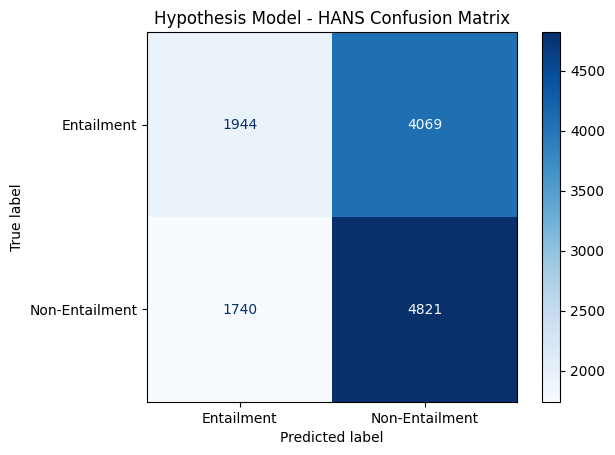

In [33]:
#Creating confusion matrix plot for Hypothesis MODEL on HANS dataset

with open('results/hypothesis_only_model_hans_metrics.json', 'r') as f:
    hypothesis_results = json.load(f)
    
confusion_matrix = hypothesis_results['confusion_matrix']


# Collapse 3x3 to 2x2 by removing neutral class (row 1, column 1)
cm_array = np.array(confusion_matrix)
cm_2x2 = np.delete(np.delete(cm_array, 1, axis=0), 1, axis=1)
# Plot 2x2 confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2x2,
                              display_labels=['Entailment', 'Non-Entailment'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Hypothesis Model - HANS Confusion Matrix')
plt.show()

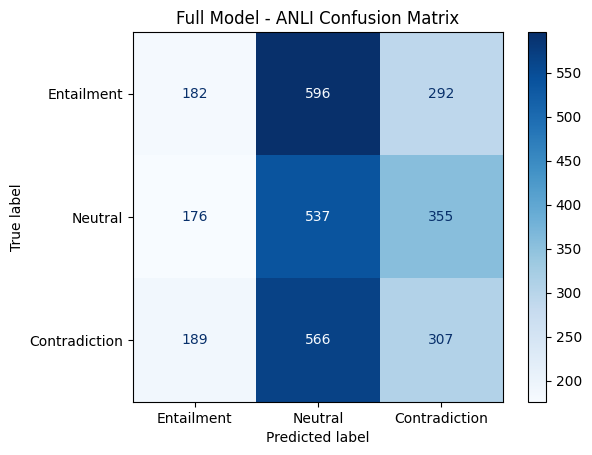

In [41]:
#Full model ANLI confusion matrix
with open('results/full_model_anli_metrics.json', 'r') as f:
    anli_results = json.load(f)

confusion_matrix = np.array(anli_results['confusion_matrix'])

# Plot 3x3 confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=confusion_matrix,
                              display_labels=['Entailment','Neutral', 'Contradiction'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Full Model - ANLI Confusion Matrix')
plt.show()

In [20]:
#reading metric.json files to create tabular dataset for paper
import os
import json
import pandas as pd

#base model
base_model_snli = 'fp-dataset-artifacts/full_model/eval_metrics.json'
base_model_hans = 'results/full_model_hans_metrics.json'
base_model_anli = 'results/full_model_anli_metrics.json'

#hypothesis model
hypothesis_only_snli = 'fp-dataset-artifacts/hypothesis_only_model/eval_metrics.json'
hypothesis_only_hans = 'results/hypothesis_only_model_hans_metrics.json'
hypothesis_only_anli = 'results/hypothesis_only_model_anli_metrics.json'

base_snli_hans_concat_snli = 'results/snli_hans_base_model/eval_metrics.json'
base_snli_hans_concat_hans = 'results/snli_hans_base_hans_metrics.json'
base_snli_hans_concat_anli = 'results/snli_hans_base_anli_metrics.json'

#debiased model
debiased_snli = 'results/ensemble_debiased_alpha_0_5_3epochs/eval_metrics.json'
debiased_hans = 'results/debiased_model_hans_metrics.json'
debiased_anli = 'results/debiased_model_anli_metrics.json'

#debiased with snli hans concat
debiased_snli_hans_concat_snli = 'results/ensemble_snli_hans_alpha_0_5/eval_metrics.json'
debiased_snli_hans_concat_hans = 'results/snli_hans_debiased_hans_metrics.json'
debiased_snli_hans_concat_anli = 'results/snli_hans_debiased_anli_metrics.json'

In [21]:
def load_metrics(file_path):
    with open(file_path, 'r') as f:
        return json.load(f)
    
metrics_data = {
    'Base Model SNLI': load_metrics(base_model_snli),
    'Base Model HANS': load_metrics(base_model_hans),
    'Base Model ANLI': load_metrics(base_model_anli),
    'Base SNLI+HANS SNLI': load_metrics(base_snli_hans_concat_snli),
    'Base SNLI+HANS HANS': load_metrics(base_snli_hans_concat_hans),
    'Base SNLI+HANS ANLI': load_metrics(base_snli_hans_concat_anli),
    'Hypothesis Only SNLI': load_metrics(hypothesis_only_snli),
    'Hypothesis Only HANS': load_metrics(hypothesis_only_hans),
    'Hypothesis Only ANLI': load_metrics(hypothesis_only_anli),
    'Debiased Model SNLI': load_metrics(debiased_snli),
    'Debiased Model HANS': load_metrics(debiased_hans),
    'Debiased Model ANLI': load_metrics(debiased_anli),
    'Debiased SNLI+HANS SNLI': load_metrics(debiased_snli_hans_concat_snli),
    'Debiased SNLI+HANS HANS': load_metrics(debiased_snli_hans_concat_hans),
    'Debiased SNLI+HANS ANLI': load_metrics(debiased_snli_hans_concat_anli),
}

In [25]:
# Rename eval_accuracy to overall_accuracy in all metrics
for key, metrics in metrics_data.items():
    if 'eval_accuracy' in metrics:
        metrics['overall_accuracy'] = metrics.pop('eval_accuracy')

In [26]:
# Convert to DataFrame for better visualization
df_metrics = pd.DataFrame.from_dict(metrics_data, orient='index')
df_metrics = df_metrics[[col for col in df_metrics.columns if col not in ['eval_loss', 'eval_runtime', 'eval_samples_per_second', 'eval_steps_per_second', 'epoch']]]

[[14860, 0, 140], [0, 0, 0], [13621, 0, 1379]]

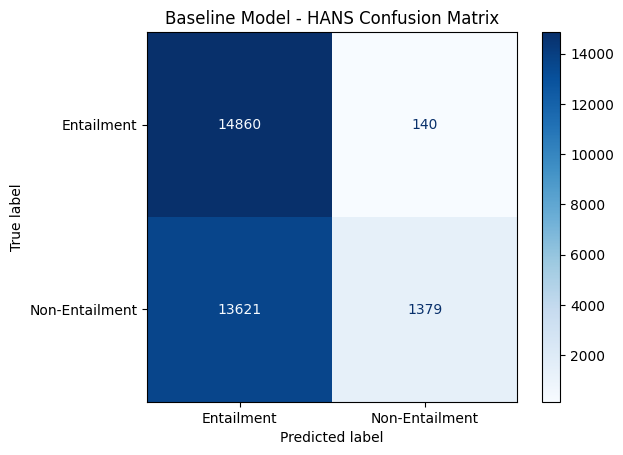

In [38]:
#create confusion matrix plot for Base model and HANS
#Creating confusion matrix plot for FULL MODEL on HANS dataset
# Collapse 3x3 to 2x2 by removing neutral class (row 1, column 1)
cm_array = np.array(metrics_data['Base Model HANS']['confusion_matrix'])
cm_2x2 = np.delete(np.delete(cm_array, 1, axis=0), 1, axis=1)
# Plot 2x2 confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm_2x2,
                              display_labels=['Entailment', 'Non-Entailment'])
disp.plot(cmap=plt.cm.Blues)
plt.title('Baseline Model - HANS Confusion Matrix')
plt.show()

In [27]:
df_metrics

,overall_accuracy,entailment_accuracy,non_entailment_accuracy,heuristic_accuracies,confusion_matrix
Base Model SNLI,0.897480,NaN,NaN,NaN,NaN
Base SNLI+HANS SNLI,0.897074,NaN,NaN,NaN,NaN
Hypothesis Only SNLI,0.697826,NaN,NaN,NaN,NaN
Debiased Model SNLI,0.897175,NaN,NaN,NaN,NaN
Debiased SNLI+HANS SNLI,0.893416,NaN,NaN,NaN,NaN
Base Model HANS,0.541300,0.990667,0.091933,"{'subsequence': 0.5, 'lexical_overlap': 0.6196...","[[14860, 0, 140], [0, 0, 0], [13621, 0, 1379]]"
Base Model ANLI,0.320625,0.170093,0.396244,NaN,"[[182, 596, 292], [176, 537, 355], [189, 566, ..."
Base SNLI+HANS HANS,1.000000,1.000000,1.000000,"{'constituent': 1.0, 'subsequence': 1.0, 'lexi...","[[15000, 0, 0], [0, 0, 0], [0, 0, 15000]]"
Base SNLI+HANS ANLI,0.320625,0.214953,0.373709,NaN,"[[230, 479, 361], [207, 434, 427], [249, 451, ..."
Hypothesis Only HANS,0.225500,0.129600,0.321400,"{'subsequence': 0.2809, 'lexical_overlap': 0.1...","[[1944, 8987, 4069], [0, 0, 0], [1740, 8439, 4..."


(0.0, 1.0)

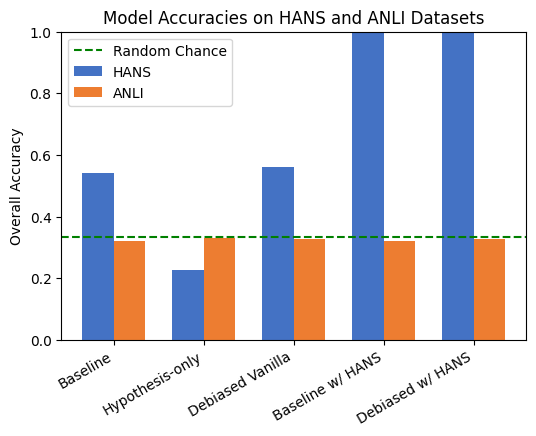

In [42]:
#creating grouped barchart to show HANS and ANLI accuracies for different models
import matplotlib.pyplot as plt
import numpy as np  

models = [
    'Baseline',
    'Hypothesis-only',
    'Debiased Vanilla',
    'Baseline w/ HANS',
    'Debiased w/ HANS'
]

overall_hans_accuracies = [
    metrics_data['Base Model HANS']['overall_accuracy'],
    metrics_data['Hypothesis Only HANS']['overall_accuracy'],
    metrics_data['Debiased Model HANS']['overall_accuracy'],
    metrics_data['Base SNLI+HANS HANS']['overall_accuracy'],
    metrics_data['Debiased SNLI+HANS HANS']['overall_accuracy']
]

overall_anli_accuracies = [
    metrics_data['Base Model ANLI']['overall_accuracy'],
    metrics_data['Hypothesis Only ANLI']['overall_accuracy'],
    metrics_data['Debiased Model ANLI']['overall_accuracy'],
    metrics_data['Base SNLI+HANS ANLI']['overall_accuracy'],
    metrics_data['Debiased SNLI+HANS ANLI']['overall_accuracy']
]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(x - width/2, overall_hans_accuracies, width, label='HANS', color='#4472C4')
rects2 = ax.bar(x + width/2, overall_anli_accuracies, width, label='ANLI', color='#ED7D31')

#adding horizontal line at 33.33
ax.axhline(y=0.3333, color = 'green', linestyle = '--', label = 'Random Chance')


# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Overall Accuracy')
ax.set_title('Model Accuracies on HANS and ANLI Datasets')
ax.set_xticks(x)
ax.set_xticklabels(models, rotation=30, ha='right')
ax.legend()
ax.set_ylim([0, 1.0])



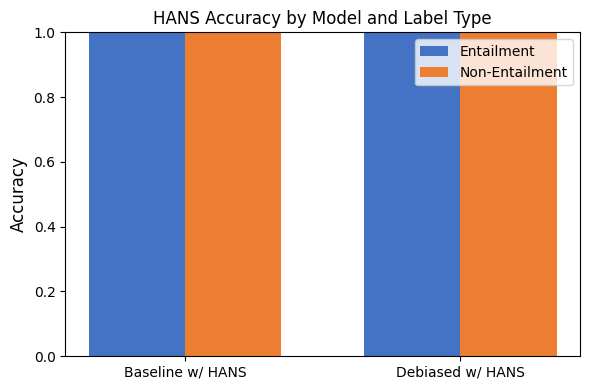

In [46]:
models = [
    'Baseline w/ HANS',
    'Debiased w/ HANS'
]

entailment_accuracies = [
    metrics_data['Base SNLI+HANS HANS']['entailment_accuracy'],
    metrics_data['Debiased SNLI+HANS HANS']['entailment_accuracy']
]

non_entailment_accuracies = [
    metrics_data['Base SNLI+HANS HANS']['non_entailment_accuracy'],
    metrics_data['Debiased SNLI+HANS HANS']['non_entailment_accuracy']
]

x = np.arange(len(models))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(6, 4))
rects1 = ax.bar(x - width/2, entailment_accuracies, width, label='Entailment', color='#4472C4')
rects2 = ax.bar(x + width/2, non_entailment_accuracies, width, label='Non-Entailment', color='#ED7D31')

#adding labels and title
ax.set_ylabel('Accuracy', fontsize=12)
ax.set_title('HANS Accuracy by Model and Label Type')
ax.set_xticks(x)
ax.set_xticklabels(models)
ax.legend()
ax.set_ylim([0, 1.0])

plt.tight_layout()
plt.show()